In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Activation

C:\Users\Anurag\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
counter = 0
nbepochs = 2
batch_size_ = 10
timestamp = pd.DataFrame()

In [3]:
filter_cols = ["Open", "High", "Low", "Close"]
x_window_size = 14
y_window_size = 1
y_column = "Open"

In [4]:
btcp = []
btcp_pred = []
Result = []
Test = []

down = 0
up = 0

YY = []

In [5]:
dataset = pd.read_csv('GOOG.csv')
l = len(dataset)

In [6]:
model = Sequential()
while True:
    
    up = down + 200
    if up > l:
        break
    data = dataset[down:up]
    
    print("**up = ", up, '  ** len(dataset) = ', l)
    
    time = data['Date'][-100:]
    timestamp = pd.concat((timestamp, time), axis = 0)
    
    if (filter_cols):
        # Remove any columns from data that we don't need by getting the difference between cols and filter list
        rm_cols = set(data.columns) - set(filter_cols)
        for col in rm_cols:
            del data[col]
    
    # Convert y-predict column name to numerical index
    y_col = list(data.columns).index(y_column)
    
    x_train = data[:-100]
    x_test = data[-100:]
    y_test = data['Close'][-100:]
    
    x_col = x_train.columns
    
    sc_X = MinMaxScaler(feature_range=(0, 1))
    x_train = sc_X.fit_transform(x_train)
    x_test = sc_X.transform(x_test)
    
    sc_Y = MinMaxScaler(feature_range=(0, 1))
    sc_Y.fit(np.array(y_test).reshape(-1,1))
    
    x_train = pd.DataFrame(data=x_train, columns=x_col)
    x_test = pd.DataFrame(data=x_test, columns=x_col)
    y_test_scaled = x_test['Close'][-100:]
    
    num_rows = len(x_train)
    x_data = []
    y_data = []
    i = 0
    while ((i + x_window_size + y_window_size) <= num_rows):
        x_window_data = x_train[i:(i + x_window_size)]
        y_window_data = x_train[(i + x_window_size):(i + x_window_size + y_window_size)]
        
        y_average = np.average(y_window_data.values[:, y_col])
        x_data.append(x_window_data.values)
        y_data.append(y_average)
        i += 1
        
    x_np_arr = np.array(x_data)
    y_np_arr = np.array(y_data)
    
    #-------------------------------------------------------------------------------------
    
    
    if counter == 0:
        model.add(LSTM(input_dim = x_np_arr.shape[2], output_dim=10, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(x_np_arr.shape[1], return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(output_dim = 1))
        model.add(Activation("tanh"))
        model.compile(loss = "mse", optimizer = "Nadam")
        counter = 1
        
    history = model.fit(x_np_arr, y_np_arr, epochs = nbepochs, batch_size = batch_size_)
    
    
    dataset_total = pd.concat((x_train, x_test), axis = 0)
    test = dataset_total[-100-x_window_size+1:]
    
    num_rows = len(test)
    x_data = []
    i = 0
    while ((i + x_window_size) <= num_rows):
        test_window = test[i:(i + x_window_size)]
        x_data.append(test_window.values)
        i += 1
        
    x_test_arr = np.array(x_data)
    
    predicted_price = model.predict(x_test_arr)
    predicted_price = sc_Y.inverse_transform(predicted_price)
    #------------------------------------------------------------------------------
    
    Result = np.concatenate((Result, predicted_price.reshape(-1)), axis = 0)
    Test = np.concatenate((Test, y_test), axis = 0)
    down = up

**up =  200   ** len(dataset) =  2518


C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 4), units=10)`
C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Epoch 1/2
86/86 [==============================] - 3s 39ms/step - loss: 0.1060
Epoch 2/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0463
**up =  400   ** len(dataset) =  2518
Epoch 1/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 2/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0310
**up =  600   ** len(dataset) =  2518
Epoch 1/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 2/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0165
**up =  800   ** len(dataset) =  2518
Epoch 1/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 2/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0245
**up =  1000   ** len(dataset) =  2518
Epoch 1/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 2/2
86/86 [==============================] - 0s 2ms/step - loss: 0.0212
**up =  1200   ** len(dataset) =  2518
Epoch 1/2
86/86 [==========

In [17]:
Predited_Stock_Price = pd.DataFrame(data = Result, columns = ['Predicted_Price'])
Real_Stock_Price = pd.DataFrame(data = Test, columns = ['Real_Price'])

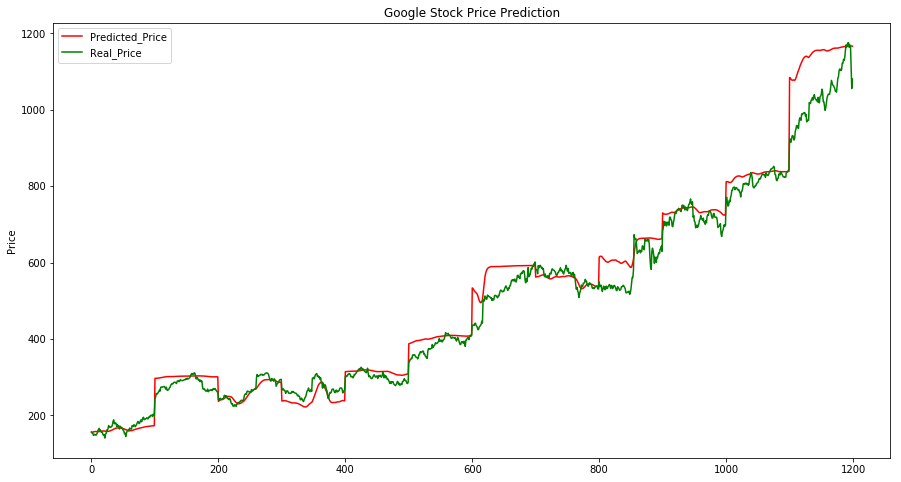

In [24]:
plt.figure(figsize = (15, 8))
plt.plot(Predited_Stock_Price['Predicted_Price'], color= 'r')
plt.plot(Real_Stock_Price['Real_Price'], color= 'g')
plt.title('Google Stock Price Prediction')
plt.ylabel('Price')
plt.legend()
plt.show()